# The Titanic Dataset
#### The task is to use the Titanic dataset to build a classifier that can predict whether someone survived the Titanic crash given some attributes.

### Obtaining the dataset

In [36]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [37]:
def load_titanic_data(train_or_test):
    '''
    Returns a pandas dataframe containing the Titanic data
    '''
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return pd.read_csv(Path(f"datasets/titanic/{train_or_test}.csv"))

### Separating into Train and Test Set

In [38]:
X_train = load_titanic_data("train")
y_train = X_train["Survived"]
X_train = X_train.drop(columns=["Survived"])

In [39]:
print(f"The shape of the training data: {X_train.shape} and labels: {y_train.shape}")

The shape of the training data: (891, 11) and labels: (891,)


In [40]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


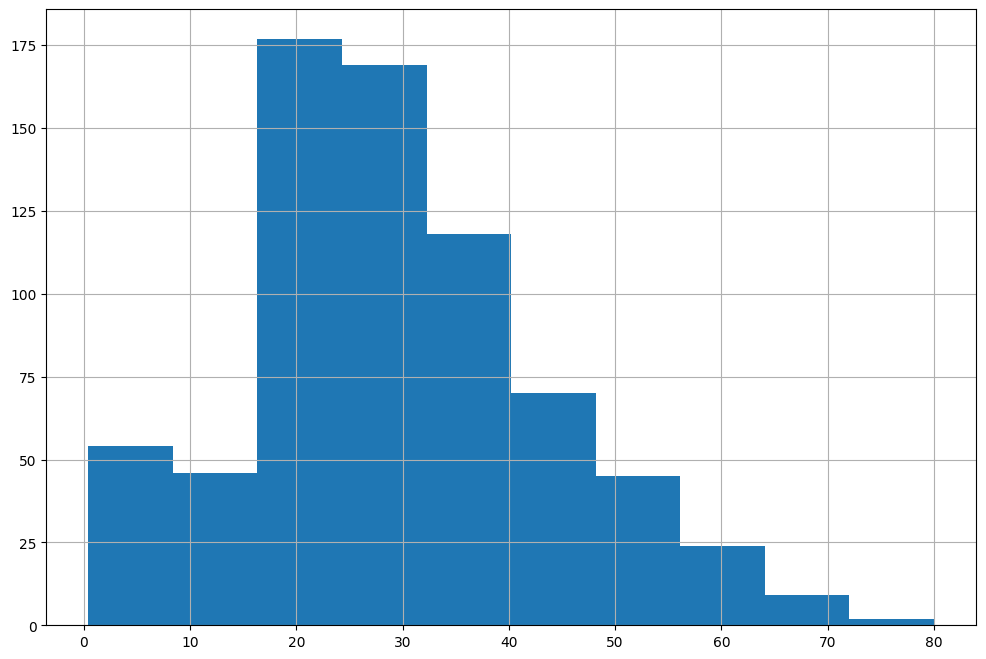

In [41]:
import matplotlib.pyplot as plt

X_train["Age"].hist(bins=10, figsize=(12, 8))
plt.show()

In [42]:
X_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [43]:
X_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Training Data Summary
- A large percentage of passengers are between 20 and 30
- There are 577 males and 314 females
- The majority of tickets are 3rd class tickets
- So when splitting the data into training and validation, we may want to stratify on the these 3 categories. We can combine them to create the classes:
    - `male_child_c1` : a male below the age of 18 with a first class ticket
    - `male_youngAdult_c1` : a male between 18 and 35 (inclusive) with a first class ticket
    - `male_adult_c1` : a male between over 35 with a first class ticket

    - `male_child_c2` : a male below the age of 18 with a second class ticket
    - `male_youngAdult_c2` : a male between 18 and 35 (inclusive) with a second class ticket
    - `male_adult_c2` : a male between over 35 with a second class ticket

    - `male_child_c3` : a male below the age of 18 with a third class ticket
    - `male_youngAdult_c3` : a male between 18 and 35 (inclusive) with a third class ticket
    - `male_adult_c3` : a male between over 35 with a third class ticket

    - `female_child_c1` : a female below the age of 18 with a first class ticket
    - `female_youngAdult_c1` : a female between 18 and 35 (inclusive) with a first class ticket
    - `female_adult_c1` : a female between over 35 with a first class ticket

    - `female_child_c2` : a female below the age of 18 with a second class ticket
    - `female_youngAdult_c2` : a female between 18 and 35 (inclusive) with a second class ticket
    - `female_adult_c2` : a female between over 35 with a second class ticket
    
    - `female_child_c3` : a female below the age of 18 with a third class ticket
    - `female_youngAdult_c3` : a female between 18 and 35 (inclusive) with a third class ticket
    - `female_adult_c3` : a female between over 35 with a third class ticket

In [44]:
import numpy as np

age_categories = []
for i in range(len(X_train)):
    curr_age = X_train.iloc[i]["Age"] 
    if curr_age < 18:
        age_categories.append("child")
    elif curr_age > 35:
        age_categories.append("adult")
    elif curr_age >= 18 and curr_age <=35:
        age_categories.append("youngAdult")
    else:
        age_categories.append(np.nan)

X_train["age_category"] = age_categories

In [45]:
X_train[["Age", "age_category"]]

,Age,age_category
0,22.0,youngAdult
1,38.0,adult
2,26.0,youngAdult
3,35.0,youngAdult
4,35.0,youngAdult
...,...,...
886,27.0,youngAdult
887,19.0,youngAdult
888,NaN,NaN
889,26.0,youngAdult


In [46]:
# This is the final test set which is used to simulate real-world instances of the data
X_test = load_titanic_data("test")
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
